In [1]:
import pandas as pd
import diff_classifier.aws as aws
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy.ma as ma
%matplotlib inline

In [15]:
def general_violinplot(positions, datasets, labels, points=40, ylim=[0, 1], majorticks = np.linspace(0, 1, 11)):
    
    pos = positions
    to_graph = datasets
    
    def set_axis_style(ax, labels):
        ax.get_xaxis().set_tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(np.arange(1, len(labels) + 1))
        ax.set_xticklabels(labels)
        ax.set_xlim(0.25, len(labels) + 0.75)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    #to_graph = [cortex, hipp, thal]
    #pos = [1, 2, 3]
    axes.violinplot(to_graph, pos, points=points, widths=0.9, showmeans=True, showextrema=False)
    set_axis_style(axes, labels)
    axes.tick_params(axis = 'both', which = 'major', labelsize = 16)
    axes.set_ylim(ylim)
    axes.set_yticks(majorticks)
    
    plt.show()

In [3]:
def prep_regional_data(prefix, videos=5, feature='boundedness', folder="01_18_Experiment"):

    #cortex
    cortexnames = []
    puppies = []
    cortex = []
    for vid in range(0, videos):
        pref = "{}_{}".format(prefix, "%04d" % vid)
        pup = prefix.split('_')[0]
        puppies.append(pup)
        fname = 'features_{}.csv'.format(pref)
        cortexnames.append(fname)

        aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
        features = pd.read_csv(cortexnames[vid])
        cortex.extend(features[feature].dropna().tolist())

    #hippocampus
    hippnames = []
    puppies = []
    hipp = []
    add = videos
    for vid in range(0, videos):
        pref = "{}_{}".format(prefix, "%04d" % int(vid+add))
        pup = prefix.split('_')[0]
        puppies.append(pup)
        fname = 'features_{}.csv'.format(pref)
        hippnames.append(fname)

        aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
        features = pd.read_csv(hippnames[vid])
        hipp.extend(features[feature].dropna().tolist())

    #thalamus
    thalnames = []
    puppies = []
    thal = []
    add = 2*videos
    for vid in range(0, videos):
        pref = "{}_{}".format(prefix, "%04d" % int(vid+add))
        pup = prefix.split('_')[0]
        puppies.append(pup)
        fname = 'features_{}.csv'.format(pref)
        thalnames.append(fname)

        aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
        features = pd.read_csv(thalnames[vid])
        thal.extend(features[feature].dropna().tolist())

    to_graph = [cortex, hipp, thal]
    
    return to_graph

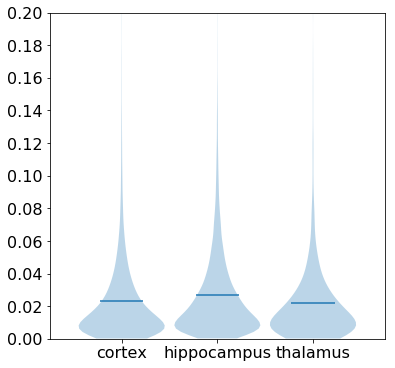

In [22]:
general_violinplot([1, 2, 3], COOH_case, ['cortex', 'hippocampus', 'thalamus'], points=500,
                   ylim=[0, 0.2], majorticks = np.linspace(0, 0.2, 11))

In [49]:
#COOH case
feature = 'straightness'
COOH_case = prep_regional_data('P3_S1_R', feature=feature)
PEG_case = prep_regional_data('P3_S1_L', feature=feature)

cortex_case = [COOH_case[0], PEG_case[0]]
hipp_case = [COOH_case[1], PEG_case[1]]
thal_case = [COOH_case[2], PEG_case[2]]

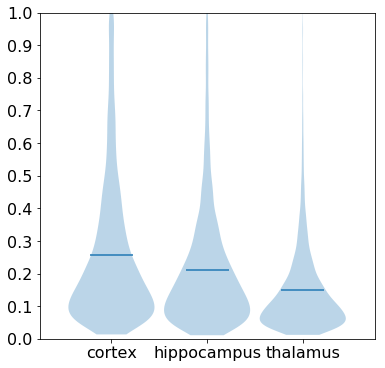

In [50]:
ylim = [0, 1]
majorticks = np.linspace(0, 1, 11)

general_violinplot([1, 2, 3], PEG_case, ['cortex', 'hippocampus', 'thalamus'], points=500,
                   ylim=ylim, majorticks = majorticks)

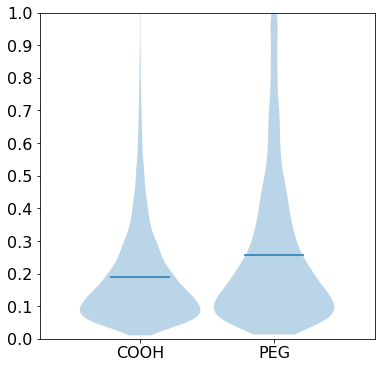

In [51]:
general_violinplot([1, 2], cortex_case, ['COOH', 'PEG'], points=500,
                   ylim=ylim, majorticks = majorticks)

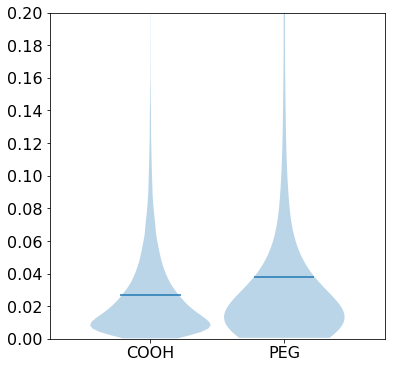

In [25]:
general_violinplot([1, 2], hipp_case, ['COOH', 'PEG'], points=500,
                   ylim=[0, 0.2], majorticks = np.linspace(0, 0.2, 11))

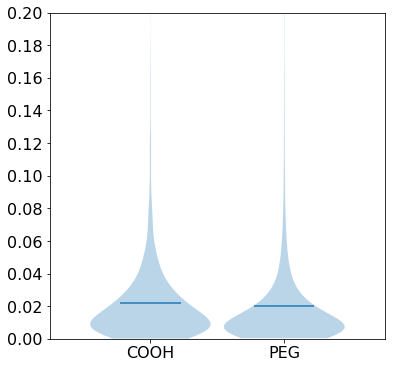

In [26]:
general_violinplot([1, 2], thal_case, ['COOH', 'PEG'], points=500,
                   ylim=[0, 0.2], majorticks = np.linspace(0, 0.2, 11))